# Sberbank Kaggle Project Workspace
<br>

- <a href="#load"> Loading and Inspecting Dataframes</a><br>
- <a href="#sumstat"> Summary Statistics</a><br>
- <a href="#td"> Train Distance Subset<br>
    - <a href="#td_mlr"> Multi Linear Regression</a> ** Imputer Right Below**<br>
        - <a href="#td_mlr_coef"> Coefficients </a><br>
        - <a href="#td_mlr_coef_dist_log"> Coefficients(Log Price) </a>
    - <a href="#td_lasso"> Lasso Regression </a><br>
        - <a href="#td_lasso_coef"> Coefficients </a><br>
        - <a href="#td_lasso_coef_log"> Coefficients (Log Price) </a><br>

<br>
<br>
<br>
<p><a name ="load"></a></p>
## Loading and Inspecting Dataframes

In [27]:
import sklearn
assert(sklearn.__version__ > '0.18' and sklearn.__version__ < '0.20')
import sklearn.model_selection as ms
import sklearn.linear_model as linear_model
import math
%matplotlib inline

In [28]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno
import os

In [29]:
## loading data as Pandas dataframes
train_raw = pd.read_csv(os.path.join('train.csv'), 
                        header='infer', 
                        index_col='id',
                        parse_dates=['timestamp'])
test_raw = pd.read_csv(os.path.join('test.csv'), 
                       header='infer', 
                       index_col='id',
                       parse_dates=['timestamp'])
macro = pd.read_csv(os.path.join('macro.csv'), 
                    header='infer')


In [39]:
train_raw

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000


In [33]:
test_raw.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,
30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,...,8,0,0,0,1,10,1,0,14,1
30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0,...,4,1,1,0,2,11,0,1,12,1
30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,...,42,11,4,0,10,21,0,10,71,11
30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,...,1,1,2,0,0,10,0,0,2,0
30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,...,5,1,1,0,2,12,0,1,11,1


In [26]:
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


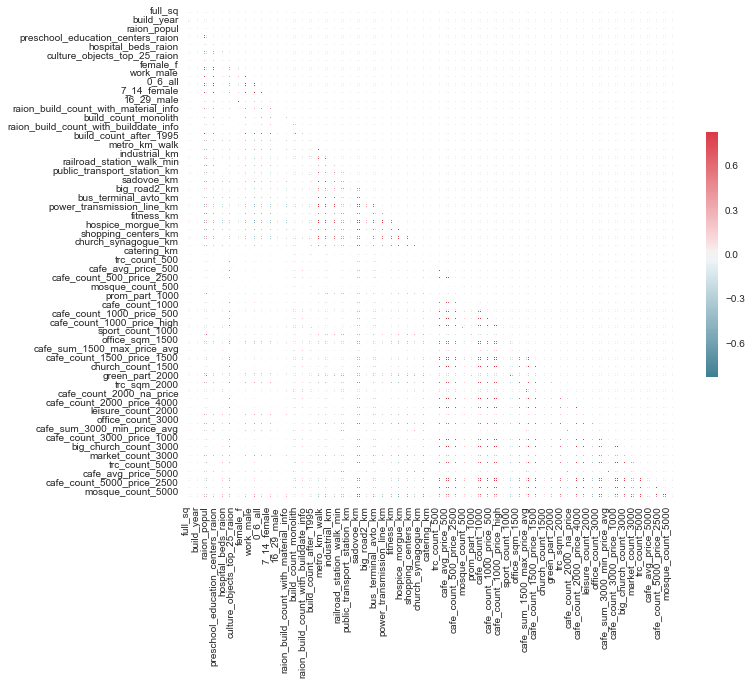

In [7]:
# # Compute the correlation matrix
# corr = train_raw.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
#             square=True, xticklabels=5, yticklabels=5,
#             linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)



In [8]:
# train_raw.corr().head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
full_sq,1.000000,0.161112,0.089649,0.119225,0.032866,-0.006041,0.695444,0.020026,-0.091348,0.056303,...,0.039083,0.040059,0.043560,0.026895,0.028579,0.021568,0.030218,0.001580,-0.041254,0.341840
life_sq,0.161112,1.000000,0.045090,0.042442,0.011393,-0.002401,0.191024,0.000633,-0.066633,0.061395,...,0.028735,0.031551,0.034888,0.017845,0.018114,0.009945,0.022737,-0.014499,-0.050337,0.165606
floor,0.089649,0.045090,1.000000,0.454488,-0.009043,0.001192,-0.005657,-0.008457,-0.113906,-0.019448,...,-0.034791,-0.029636,-0.022303,-0.044398,-0.045614,-0.012256,-0.044236,-0.102101,-0.123843,0.117447
max_floor,0.119225,0.042442,0.454488,1.000000,0.045915,-0.000261,-0.014220,0.020345,-0.072161,-0.092954,...,-0.040235,-0.033662,-0.029525,-0.048235,-0.048240,-0.058255,-0.048664,-0.099855,-0.113341,0.094386
material,0.032866,0.011393,-0.009043,0.045915,1.000000,-0.004402,-0.026924,0.038747,-0.034225,0.001182,...,0.050919,0.043660,0.044403,0.038480,0.044701,0.050355,0.044502,0.098482,0.076378,0.064047


In [9]:
# corr_list = train_raw.corr().abs().unstack().sort_values(ascending=False)

In [10]:
# corr_list = pd.DataFrame(corr_list)

In [11]:
#Top 50 Correlations by Descending Order

# corr_list.columns = ['Pearson R']
# corr_list[corr_list['Pearson R'] < 0.9999999999999].head(50)

,,Pearson R
raion_build_count_with_material_info,raion_build_count_with_builddate_info,0.999990
raion_build_count_with_builddate_info,raion_build_count_with_material_info,0.999990
0_13_all,young_all,0.999885
young_all,0_13_all,0.999885
young_female,0_13_female,0.999871
0_13_female,young_female,0.999871
0_13_male,young_male,0.999861
young_male,0_13_male,0.999861
full_all,female_f,0.999850
female_f,full_all,0.999850


<br>
<br>
<br>
<p><a name=sumstat></a><p>

## Summary Statistics

In [12]:
train_raw.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [13]:
train_raw.columns.get_loc('price_doc') #price_doc has index of 290

290

<a name=td></a>

## Train Distance Subset

In [14]:
train_dist = train_raw.iloc[:, np.r_[290,0,86:152]]
train_dist.head()

,price_doc,timestamp,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,...,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology
id,,,,,,,,,,,,,,,,,,,,,
1,5850000,2011-08-20,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,...,0.947962,0.177975,0.625783,0.628187,3.932040,14.053047,7.389498,7.023705,0.516838,good
2,6000000,2011-08-23,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,...,1.072315,0.273345,0.967821,0.471447,4.841544,6.829889,0.709260,2.358840,0.230287,excellent
3,5700000,2011-08-27,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,4.912660,...,0.391957,0.158072,3.178751,0.755946,7.922152,4.273200,3.156423,4.958214,0.190462,poor
4,13100000,2011-09-01,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,15.623710,...,0.892674,0.236455,1.031777,1.561505,15.300449,16.990677,16.041521,5.029696,0.465820,good
5,16331452,2011-09-05,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,10.683540,...,0.810801,0.376838,0.378756,0.121681,2.584370,1.112486,1.800125,1.339652,0.026102,excellent


In [15]:
train_dist.describe()

,price_doc,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km
count,3.047100e+04,30446.000000,30446.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,7.123035e+06,42.737601,3.561467,0.981684,1.323956,3.099942,0.300511,0.768831,11.167613,2.314765,...,2.010973,1.328488,1.345235,2.330047,0.972014,7.739237,9.638074,7.063236,5.552256,0.687988
std,4.780111e+06,69.303131,5.775261,2.121956,3.058145,3.965363,0.298402,0.717953,7.036351,1.451071,...,2.306446,1.526219,3.053600,2.986937,0.748876,5.780424,7.112284,5.702807,5.304206,0.832922
min,1.000000e+05,0.000000,0.000000,0.000470,0.000000,0.003737,0.000000,0.000000,0.274139,0.000000,...,0.000000,0.000000,0.000000,0.004072,0.000000,0.005545,0.026788,0.007903,0.008949,0.000357
25%,4.740002e+06,11.484150,0.957013,0.199946,0.269716,0.973297,0.100951,0.288289,5.304559,1.334801,...,0.555231,0.474842,0.285124,0.860469,0.532480,3.766071,4.225254,2.879357,2.243788,0.208621
50%,6.274411e+06,20.447209,1.703934,0.353762,0.474862,1.803889,0.214336,0.576464,10.378040,1.968520,...,1.052999,0.899034,0.493048,1.490794,0.860037,6.543563,8.612007,5.643495,4.106649,0.412701
75%,8.300000e+06,45.322032,3.776836,0.971417,0.886531,3.404787,0.415498,1.041085,16.791370,3.089480,...,3.046687,1.571062,0.936324,2.922264,1.248480,10.047046,13.459593,10.328587,6.968701,0.841418
max,1.111111e+08,711.215806,59.267984,29.085774,47.394706,47.351538,1.982448,14.048162,47.591240,15.778710,...,18.958933,24.268209,47.394706,45.669060,15.615728,44.849832,87.600690,59.203148,54.431244,12.162697


<br>
<br>
<br>
<p><a name="td_mlr"></a></p>
## <span style="color:blue">Multiple Linear Regression for Train_Distance </span>

<br>
Selecting subset of the table with distance columns from training set:

In [16]:
#####
price = train_dist['price_doc']
train_dist_num = train_dist._get_numeric_data()

** Imputer **

In [17]:
train_dist_num = train_dist_num.ix[:,1:]
train_dist_num

,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km
id,,,,,,,,,,,,,,,,,,,,,
1,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,...,0.637189,0.947962,0.177975,0.625783,0.628187,3.932040,14.053047,7.389498,7.023705,0.516838
2,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.648587,...,0.688796,1.072315,0.273345,0.967821,0.471447,4.841544,6.829889,0.709260,2.358840,0.230287
3,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,4.912660,3.381083,11.996480,...,1.543049,0.391957,0.158072,3.178751,0.755946,7.922152,4.273200,3.156423,4.958214,0.190462
4,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,15.623710,2.017080,14.317640,...,0.934273,0.892674,0.236455,1.031777,1.561505,15.300449,16.990677,16.041521,5.029696,0.465820
5,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,10.683540,2.936581,11.903910,...,0.077901,0.810801,0.376838,0.378756,0.121681,2.584370,1.112486,1.800125,1.339652,0.026102
6,18.378170,1.531514,0.145955,0.113466,1.073495,1.497903,0.256487,7.186740,0.780330,14.075140,...,0.422358,3.066285,0.113466,0.686932,0.870447,4.787706,3.388810,3.713557,2.553424,0.004469
7,12.322993,1.026916,0.501166,0.516979,2.393239,0.632445,0.707268,13.900700,1.371596,10.329880,...,0.067725,0.273019,0.516979,0.822377,0.318230,4.484941,0.752223,2.969315,3.373343,0.447174
8,11.527788,0.960649,0.134365,0.581511,1.602056,0.165124,1.166992,23.118380,1.131798,4.042541,...,0.872231,0.371857,0.581511,1.079769,0.558239,4.469517,13.152310,8.018089,7.718967,0.373715
9,14.742289,1.228524,0.112905,0.256589,0.939584,0.148957,0.670432,20.940970,1.759887,3.925497,...,1.143674,0.217477,0.256589,0.554880,0.555963,4.432753,6.788241,5.273171,2.449453,0.123610


In [18]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
tdimp = imputer.fit_transform(train_dist_num)

print train_dist_num.shape
print tdimp.shape
tdimp_df = pd.DataFrame(tdimp)
price = train_dist['price_doc']

(30471, 62)
(30471L, 62L)



<br>
**Remove Variance less than 1**
<br>


In [19]:
import sklearn.feature_selection as fs
print tdimp.shape #Before
tdimp = fs.VarianceThreshold(threshold = 1).fit_transform(tdimp)
print tdimp.shape #After


(30471L, 62L)
(30471L, 57L)


<br>
<p><a name="td_mlr_coef"></a></p>

 ### <span style="color:red">[MLR] Coefficients </span>

<br>

In [20]:
linear = linear_model.LinearRegression()

linear.fit(tdimp, price)

linear_df = pd.DataFrame(linear.coef_)
linear_df.columns = ['coef']

# print linear_df[abs(linear_df.coef) > 1e-5]  Unused
best_coef = linear_df[abs(linear_df.coef) > 1e+4] 
# print linear_df[abs(linear_df.coef) > 1e-6]  #Trying to find the largest coefficients to work with

best_coef.index #index for columns that meet the criteria in MLR

Int64Index([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 11, 12, 14, 15, 16, 17, 18, 19,
            20, 21, 22, 23, 25, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39,
            40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
            56],
           dtype='int64')

In [55]:
#Index in linear_df should be the same as the tdimp dataframe, and by extension, the train_dist_num frame.
train_dist_num.columns[11]
a = train_dist_num.iloc[:,np.r_[best_coef.index]] #Using the index from linear_df to get variable name from train_dist_num
b = a.isnull().sum() #Missing Values

best_coef['Variable'] = a.columns
print("The determination of this regression is: %.4f" %linear.score(tdimp, price))
print("RSS: %.2f" % np.sum((price - linear.predict(tdimp)) ** 2))
print("MSE:", np.mean((linear.predict(tdimp).astype('float64') - price) ** 2)) #1.869365637e+13, probably shouldn't use




The determination of this regression is: 0.1819
RSS: 569614319974181056.00
('MSE:', 18693653637037.875)


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
best_coef[['Variable','coef']]

,Variable,coef
0,metro_min_walk,-4.104213e+12
1,metro_km_walk,4.925056e+13
2,kindergarten_km,2.359479e+04
3,school_km,1.727194e+05
5,green_zone_km,-1.102924e+05
6,industrial_km,9.750984e+04
7,water_treatment_km,-7.557654e+04
8,cemetery_km,-3.884803e+13
9,incineration_km,3.237336e+12
11,railroad_station_walk_min,1.003201e+05


<br>
<p><a name="td_mlr_coef_dist_log"></a></p>
### <span style="color:red">[MLR] Coefficients (Log Price) </span>

<br>

In [22]:


linear2 = linear_model.LinearRegression()

linear2.fit(tdimp, np.log(price))

linear_df2 = pd.DataFrame(linear2.coef_)
linear_df2.columns = ['coef']
# print linear_df2[abs(linear_df2.coef) == 1]

best_coef_log = linear_df2[abs(linear_df2.coef) > 1e-1]
# best_coef_log
a_log = train_dist_num.iloc[:,np.r_[best_coef_log.index]]
# a_log.columns

print("The determination of this regression is: %.4f" %linear2.score(tdimp, np.log(price)))
print("RSS: %.2f" % np.sum((np.log(price) - linear2.predict(tdimp)) ** 2))

best_coef_log['Variable'] = a_log.columns



# np.sum((linear2.predict(tdimp) - np.log(price))^2)
print "MSE:", np.mean((linear2.predict(tdimp).astype('float64') - np.log(price)) ** 2)
best_coef_log[['Variable','coef']]

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The determination of this regression is: 0.1286
RSS: 9704.62
MSE: 0.318487126135


,Variable,coef
0,metro_min_walk,-1.164143e+06
1,metro_km_walk,1.396972e+07
8,cemetery_km,-2.374765e+06
9,incineration_km,1.978970e+05
14,railroad_station_avto_min,-2.983464e+05
15,ID_railroad_station_avto,2.486220e+04
18,water_km,-3.204307e-01
19,mkad_km,1.092847e-01
20,ttk_km,1.003873e-01


<br>
<br>
<br>
<p><a name="td_lasso"></a></p>
## <span style="color:blue">Lasso Regression </span>

<br>


<p><a name="td_lasso_coef"></a></p>
### <span style="color:red">[Lasso] Coefficients</span>

In [23]:
lasso = linear_model.Lasso() # create a lasso instance
lasso.get_params()


{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [54]:
lasso.fit(tdimp, price) # fit data
print("The determination of this regression is: %.4f" %lasso.score(tdimp, price))
print "MSE:", np.mean((lasso.predict(tdimp).astype('float64') - price) ** 2)
print "Intercept: ", lasso.intercept_ # print out the coefficients

lasso_df = pd.DataFrame(lasso.coef_[abs(lasso.coef_) > 0])
lasso_df.columns = ['coef']
print lasso_df.index

a_log = train_dist_num.iloc[:,np.r_[lasso_df.index]]
# a_log.columns
lasso_df['Variable'] = a_log.columns
lasso_df[['Variable','coef']]



The determination of this regression is: 0.1760
MSE: 1.88265559274e+13
Intercept:  8006940.77681
RangeIndex(start=0, stop=56, step=1)


,Variable,coef
0,metro_min_walk,-1.379930e+04
1,metro_km_walk,-9.901433e+03
2,kindergarten_km,6.430759e+04
3,school_km,-5.274830e+03
4,park_km,-1.060684e+05
5,green_zone_km,3.331794e+04
6,industrial_km,-4.997239e+04
7,water_treatment_km,-2.459830e+05
8,cemetery_km,-5.194395e+00
9,incineration_km,8.558377e+03



<p><a name="td_lasso_coef_log"></a></p>
### <span style="color:red">[Lasso] Coefficients (Log Price)</span>

In [48]:
lasso_log = linear_model.Lasso(alpha=1)
lasso_log.fit(tdimp,np.log(price))

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
# tdimp_log = np.log(tdimp)


print("The determination of this regression is: %.4f" %lasso.score(tdimp, np.log(price))) 
print "MSE:", np.mean((lasso_log.predict(tdimp).astype('float64') - np.log(price)) ** 2)

# pd.DataFrame(lasso_log.coef_[abs(lasso_log.coef_) > 0]) returns non-zero coefficients under lasso with log price

lassolog_df = pd.DataFrame(lasso_log.coef_[abs(lasso_log.coef_) > 1e-6])
lassolog_df.columns = ['coef']
lassolog_df.index

a_log = train_dist_num.iloc[:,np.r_[lassolog_df.index]]
# a_log.columns
lassolog_df['Variable'] = a_log.columns
lassolog_df[['Variable','coef']]


The determination of this regression is: -149105959534294.1562
MSE: 0.34934832515


,Variable,coef
0,metro_min_walk,-0.001456
1,metro_km_walk,-0.000423
2,kindergarten_km,0.000205


<br>
<br>
<br>
<p><a name="td_tree"></a></p>
## <span style="color:blue">Decision Tree for Train_Distance </span>

<br>


<br>
<br>
<br>
# <span style="color:green"> TEST AREA</span>
<br>
<br>
<br>